# Image classification using Convolution Neural Network

## 1. Importing library

!pip install keras
!pip install tensorflow


!pip install pandas

!pip install matplotlib

!pip install opencv-python

In [48]:

from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.applications import VGG16
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
import cv2

In [49]:
DATASET_DIR = os.listdir("Dataset") 
DATASET_DIR

['Bird', 'Drone']

In [50]:
labels=['Bird', 'Drone']

## Load the images in array format

In [51]:
IMG_SIZE = 224 # image size

data = [] 

def get_data(data_dir):
    for category in labels:
        path = os.path.join(data_dir, category) #combine path
        class_num = labels.index(category) # index no of labels
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR) # color image array
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize
                data.append([resized_array, class_num])
            except Exception as e: # exception
                print(e)
    return data # return array

In [52]:
data = get_data("Dataset/")

In [53]:
x = []
y = []
for item, label in data:
    x.append(item)
    y.append(label)

In [54]:
x[0]

array([[[131, 128, 120],
        [131, 128, 120],
        [131, 128, 120],
        ...,
        [111, 109, 101],
        [112, 107,  98],
        [112, 105,  96]],

       [[132, 126, 119],
        [130, 127, 119],
        [132, 126, 119],
        ...,
        [112, 109, 101],
        [115, 107, 100],
        [112, 105,  96]],

       [[134, 127, 118],
        [132, 127, 118],
        [134, 127, 118],
        ...,
        [116, 108, 101],
        [117, 107, 100],
        [114, 104,  97]],

       ...,

       [[ 86, 122, 146],
        [ 86, 122, 146],
        [ 84, 122, 146],
        ...,
        [107, 116, 129],
        [107, 115, 128],
        [106, 114, 127]],

       [[ 86, 122, 146],
        [ 86, 122, 146],
        [ 84, 122, 146],
        ...,
        [108, 116, 129],
        [107, 115, 128],
        [106, 114, 127]],

       [[ 86, 122, 146],
        [ 86, 122, 146],
        [ 84, 122, 146],
        ...,
        [108, 116, 129],
        [108, 116, 129],
        [106, 114, 127]]

### separate item (training) and label (class)

In [55]:
x = np.array(x) / 255 #normalizing and array will be 0 --> 1
y = np.array(y)

In [56]:
x[0]

array([[[0.51372549, 0.50196078, 0.47058824],
        [0.51372549, 0.50196078, 0.47058824],
        [0.51372549, 0.50196078, 0.47058824],
        ...,
        [0.43529412, 0.42745098, 0.39607843],
        [0.43921569, 0.41960784, 0.38431373],
        [0.43921569, 0.41176471, 0.37647059]],

       [[0.51764706, 0.49411765, 0.46666667],
        [0.50980392, 0.49803922, 0.46666667],
        [0.51764706, 0.49411765, 0.46666667],
        ...,
        [0.43921569, 0.42745098, 0.39607843],
        [0.45098039, 0.41960784, 0.39215686],
        [0.43921569, 0.41176471, 0.37647059]],

       [[0.5254902 , 0.49803922, 0.4627451 ],
        [0.51764706, 0.49803922, 0.4627451 ],
        [0.5254902 , 0.49803922, 0.4627451 ],
        ...,
        [0.45490196, 0.42352941, 0.39607843],
        [0.45882353, 0.41960784, 0.39215686],
        [0.44705882, 0.40784314, 0.38039216]],

       ...,

       [[0.3372549 , 0.47843137, 0.57254902],
        [0.3372549 , 0.47843137, 0.57254902],
        [0.32941176, 0

In [57]:
!pip install sklearn

In [58]:
!pip install scikit-learn

## 2. Splitting the data into training and test set

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .25, random_state = 0)

## 3. Building CNN
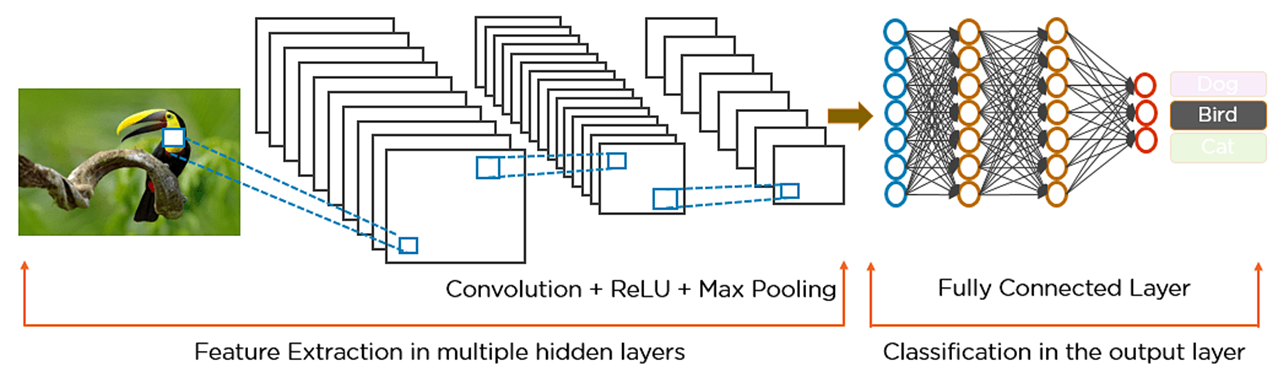
https://www.tensorflow.org/api_docs/python/tf/keras/layers
#### Step1: Convolution layer
tf.keras.layers.Conv2D(
    filters, kernel_size, strides=(1, 1), padding='valid',
    data_format=None, dilation_rate=(1, 1), groups=1, activation=None,
    use_bias=True, kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
* When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers or None, does not include the sample axis), 
* e.g. input_shape=[128, 128, 3] for 128x128 RGB pictures in data_format="channels_last". 

#### Step2: Maxpooling
tf.keras.layers.MaxPool2D(
    pool_size=(2, 2), strides=None, padding='valid', data_format=None,
    **kwargs
)
#### Step3: Adding more convolution and maxpooling layers
#### Step4: Flattening layer
tf.keras.layers.Flatten(
    data_format=None, **kwargs
)
#### Step5: Fully connected layer
tf.keras.layers.Dense(
    units, activation=None, use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros', kernel_regularizer=None,
    bias_regularizer=None, activity_regularizer=None, kernel_constraint=None,
    bias_constraint=None, **kwargs
)
* units= number of active neurons you want to add in your model

#### Step6: Output layer
* Binary classification `sigmoid` activation function
* Multiclass classification `softmax` activation functio

In [60]:
x_train.shape

(1492, 224, 224, 3)

In [61]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2,padding="same"))
model.add(Dropout(.2))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2,padding="same"))
model.add(Dropout(.2))

model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2,2,padding="same"))
model.add(Dropout(.2))

model.add(Flatten())
model.add(Dense(64, activation = "relu"))
model.add(Dropout(0.2))

model.add(Dense(1, activation = "sigmoid"))

In [62]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 activation_6 (Activation)   (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 32)      0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 111, 111, 32)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 activation_7 (Activation)   (None, 109, 109, 64)      0         
                                                      

#### Lets see the model

In [63]:
!pip install pydot

In [64]:
tf.keras.utils.plot_model(model, to_file='model1.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


### 4. Compile and train the model
RMSProp (Root Mean Square Propagation) and Adam (Adaptive Moment Estimation) are both popular optimization algorithms used in training Convolutional Neural Networks (CNNs) and other deep learning models. 
* RMSProp: RMSProp adapts the learning rates for each parameter by maintaining a moving average of squared gradients for each parameter. This helps in normalizing the updates for different parameters, making it suitable for non-stationary objectives.

* Adam: Adam combines ideas from RMSProp and Momentum. Momentum helps accelerate convergence by accumulating past gradients' effects. It maintains separate moving averages for both gradients and their squared values. This adaptive learning rate helps it converge quickly and perform well on a wide range of problems.

In [65]:
model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])

#### EarlyStopping helps prevent overfitting and can improve the efficiency of the training process by stopping training when a certain condition is met.

In [66]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

history = model.fit(x_train, y_train, epochs = 30, validation_data = (x_test, y_test), batch_size = 32, callbacks = [early_stopping])

In [67]:
model.save("cnn_v1.model") # save model

INFO:tensorflow:Assets written to: cnn_v1.model\assets


INFO:tensorflow:Assets written to: cnn_v1.model\assets


#### Display the results

fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

#### Printing the accuracy

print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

#### Save the model

score = model.evaluate(x_test, y_test)
model.save("cnn11.model") # save model

In [68]:
from tensorflow import keras
model_new = keras.models.load_model('cnn_v1.model')

In [69]:
score = model_new.evaluate(x_test, y_test)

16/16 [==============================] - 6s 295ms/step - loss: 0.6925 - accuracy: 0.4880


In [70]:
score_training = model_new.evaluate(x_train, y_train)

47/47 [==============================] - 13s 278ms/step - loss: 0.6904 - accuracy: 0.5054


## 5. Labeling & Prediction

In [71]:
prediction_x = model_new.predict(x_test)

16/16 [==============================] - 5s 255ms/step


In [72]:
class_x = np.round(prediction_x).astype(int)
class_x[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

### Confusion matrix: It is a matrix of size 2×2 for binary classification with actual values on one axis and predicted on another.
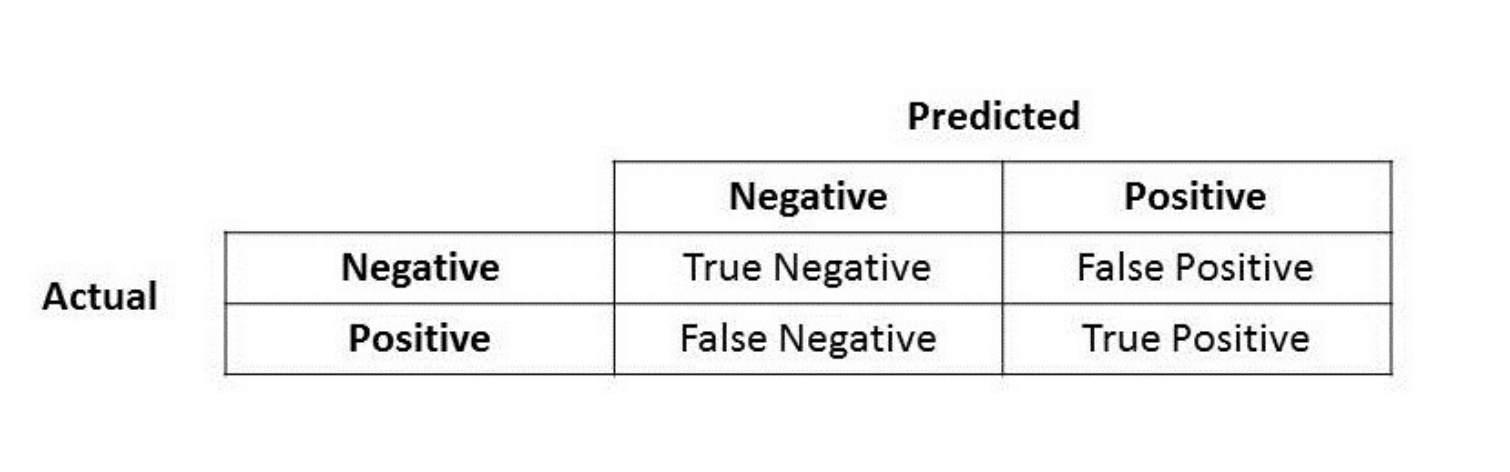
- True Positive (TP) — model correctly predicts the positive class (prediction and actual both are positive).
- True Negative (TN) — model correctly predicts the negative class (prediction and actual both are negative).
- False Positive (FP) — model gives the wrong prediction of the negative class (predicted-positive, actual-negative)
- False Negative (FN) — model wrongly predicts the positive class (predicted-negative, actual-positive). 

In [73]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [74]:
cm=confusion_matrix(y_test,class_x)

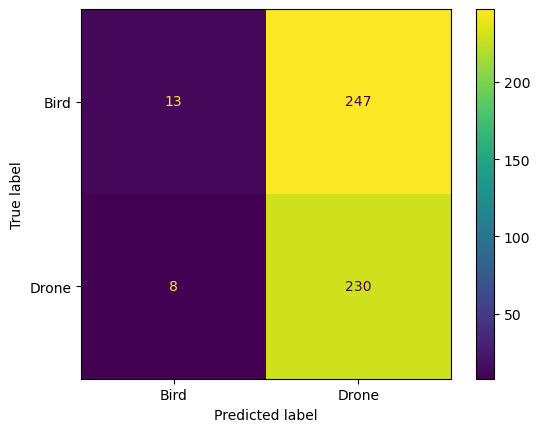

In [75]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['Bird', 'Drone'])

cm_display.plot()
plt.show()

### What does precision mean?
Precision should ideally be 1 (high) for a good classifier. Precision becomes 1 only when the numerator and denominator are equal i.e TP = TP +FP, this also means FP is zero. As FP increases the value of denominator becomes greater than the numerator and precision value decreases (which we don’t want).
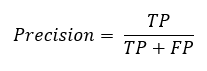

### Recall:
Recall is also known as sensitivity or true positive rate and is defined as follows:
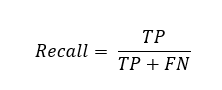
Recall should ideally be 1 (high) for a good classifier
### F1-Score:
F1-score is a metric which takes into account both precision and recall and is defined as follows
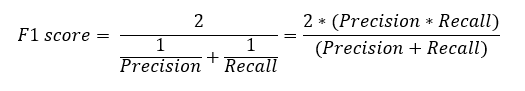
F1 Score becomes 1 only when precision and recall are both 1. F1 score becomes high only when both precision and recall are high. F1 score is the harmonic mean of precision and recall and is a better measure than accuracy.

In [76]:
print(classification_report(y_test, class_x))

              precision    recall  f1-score   support

           0       0.62      0.05      0.09       260
           1       0.48      0.97      0.64       238

    accuracy                           0.49       498
   macro avg       0.55      0.51      0.37       498
weighted avg       0.55      0.49      0.36       498



## Loading back your model

In [78]:
from tensorflow import keras
model_new = keras.models.load_model('cnn_v1.model')

### Predicting new images

In [80]:
from tensorflow.keras.preprocessing import image
test_image= image.load_img('prediction/prediction/case7.jpg',
                           target_size=(224,224))


In [81]:
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image, axis=0)

In [82]:
predict_x=model.predict(test_image/255.0) 
classes_x = np.round(predict_x).astype(int)

1/1 [==============================] - 0s 240ms/step


In [83]:

if classes_x[0][0]==0:
    prediction='bird'
else:
    prediction='drone'
print(prediction)

drone
